# Multi-Class Classification with Sentence Transformers

## Requirements

In [ ]:
!pip install setfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
from datasets import load_dataset
from sentence_transformers.losses import CosineSimilarityLoss

from setfit import SetFitModel, SetFitTrainer, TrainingArguments
import pandas as pd
from datasets import Dataset
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, f1_score, recall_score, precision_score, ConfusionMatrixDisplay
import seaborn as sns

## Loading data

In [ ]:
attitude_labels = ['affect-positive', 'affect-negative', 'judgement-positive', 'judgement-negative', 'appreciation-positive', 'appreciation-negative']

In [ ]:
# 10 examples per label (obtained from Mariia Amisinova's annotation guidelines)
training_data_df = pd.read_excel(r"data for few shot training SetFit.xlsx")
training_data_df

,text,label,speech name
0,I extend my delegation’s compliments,affect-positive,annotations from Mariia Amisinova's guidelines.
1,I am absolutely confident that we will be able...,affect-positive,annotations from Mariia Amisinova's guidelines.
2,It is a special honour and a source of deep sa...,affect-positive,annotations from Mariia Amisinova's guidelines.
3,My delegation believes,affect-positive,annotations from Mariia Amisinova's guidelines.
4,We fervently hope,affect-positive,annotations from Mariia Amisinova's guidelines.
5,We also look forward to,affect-positive,annotations from Mariia Amisinova's guidelines.
6,The delegation supports,affect-positive,annotations from Mariia Amisinova's guidelines.
7,We believe it would be very advantegeous,affect-positive,annotations from Mariia Amisinova's guidelines.
8,I am sure,affect-positive,annotations from Mariia Amisinova's guidelines.
9,I thank you very much,affect-positive,annotations from Mariia Amisinova's guidelines.


In [ ]:
# Changing column names
training_data_df = training_data_df.rename(columns={'text': 'text', 'label ': 'label'})

In [ ]:
# Dropping speech name column
training_data_df = training_data_df.drop('speech name ', axis=1)

In [ ]:
# Converting to Dataset format
training_data = Dataset.from_pandas(training_data_df)
training_data # 60 examples

Dataset({
    features: ['text', 'label'],
    num_rows: 60
})

In [ ]:
test_data_df = pd.read_excel('Results Attitude Sent-Trans Without Duplicates.xlsx')
test_data_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Annotated Text,label,Topic_Agenda Item,text,Appraisal?,Appraisal Pred Sent-Trans-BART,Appraisal Pred Sent-Trans-BERT,Appraisal Pred Sent-Trans-T5
0,wishes to express its satisfaction,affect-positive,United Nations peacekeeping operations,Uruguay wishes to express its satisfaction for...,yes,affect-positive,affect-positive,affect-positive
1,we want to thank,affect-positive,United Nations peacekeeping operations,"At the outset, we want to thank the United Sta...",yes,affect-positive,judgement-positive,affect-positive
2,is very pleased,affect-positive,United Nations peacekeeping operations,Uruguay is very pleased to join the rest of th...,yes,affect-positive,affect-positive,affect-positive
3,problem,appreciation-negative,United Nations peacekeeping operations,that dealing with this problem can no longer b...,yes,judgement-negative,judgement-positive,judgement-positive
4,voted in favour,affect-positive,United Nations peacekeeping operations,"For all of those reasons, therefore, Uruguay v...",yes,judgement-positive,judgement-positive,affect-positive
...,...,...,...,...,...,...,...,...
1599,We very much hope,affect-positive,Ukraine,We very much hope,yes,affect-positive,affect-positive,affect-positive
1600,crisis,appreciation-negative,Ukraine,and show the way towards a political solution ...,yes,judgement-positive,judgement-positive,appreciation-positive
1601,criminal decree,appreciation-negative,Ukraine,that are currently enshrined in the criminal d...,yes,judgement-negative,judgement-negative,appreciation-negative
1602,extremely significant consequences,appreciation-negative,Ukraine,That would have extremely significant conseque...,yes,judgement-negative,judgement-positive,appreciation-negative


In [ ]:
# Dropping speech name column
test_data_df = test_data_df.drop(['Anno_name_x', 'Anno_name_y'], axis=1)

In [ ]:
# Changing column names
test_data_df = test_data_df.rename(columns={'Edu Speech': 'text', 'Label': 'label'})
test_data_df

,Annotated Text,label,Topic_Agenda Item,text,Appraisal?
0,wishes to express its satisfaction,affect-positive,United Nations peacekeeping operations,Uruguay wishes to express its satisfaction for...,yes
1,we want to thank,affect-positive,United Nations peacekeeping operations,"At the outset, we want to thank the United Sta...",yes
2,is very pleased,affect-positive,United Nations peacekeeping operations,Uruguay is very pleased to join the rest of th...,yes
3,problem,appreciation-negative,United Nations peacekeeping operations,that dealing with this problem can no longer b...,yes
4,voted in favour,affect-positive,United Nations peacekeeping operations,"For all of those reasons, therefore, Uruguay v...",yes
...,...,...,...,...,...
1599,We very much hope,affect-positive,Ukraine,We very much hope,yes
1600,crisis,appreciation-negative,Ukraine,and show the way towards a political solution ...,yes
1601,criminal decree,appreciation-negative,Ukraine,that are currently enshrined in the criminal d...,yes
1602,extremely significant consequences,appreciation-negative,Ukraine,That would have extremely significant conseque...,yes


In [ ]:
# Getting attitude golden labels
gold_labels_attitude= []
for i in range(test_data_df.shape[0]):
  gold_labels_attitude.append(test_data_df.iloc[i]["label"])

In [ ]:
test_data = Dataset.from_pandas(test_data_df)
test_data #2743 - despues de remover los duplicates la data quedo de 1604 filas

Dataset({
    features: ['Annotated Text', 'label', 'Topic_Agenda Item', 'text', 'Appraisal?', 'Appraisal Pred Sent-Trans-BART', 'Appraisal Pred Sent-Trans-BERT', 'Appraisal Pred Sent-Trans-T5'],
    num_rows: 1604
})

# SetFit with BERT (paraphrase-mpnet-base-v2)

## Loading Model


In [ ]:
model = SetFitModel.from_pretrained("sentence-transformers/paraphrase-mpnet-base-v2")

config.json:   0%|          | 0.00/594 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
args = TrainingArguments(
    batch_size=16,
    num_epochs=1,# Number of epochs to use for contrastive learning
)

In [ ]:
model.lables = ['affect-positive', 'affect-negative', 'appreciation-positive', 'appreciation-negative', 'judgement-positive', 'judgement-negative']

In [ ]:
# Creating the trainer
trainer = SetFitTrainer(
    model=model,
    train_dataset=training_data,
    eval_dataset=test_data,
    loss_class=CosineSimilarityLoss,
    batch_size=16,
    num_iterations=20, # Number of text pairs to generate for contrastive learning
    num_epochs=1, # Number of epochs to use for contrastive learning
    column_mapping={"text": "text", "label": "label"}
)

<ipython-input-37-efd66ac206d1>:2: DeprecationWarning: `SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.
  trainer = SetFitTrainer(
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset


Map:   0%|          | 0/60 [00:00<?, ? examples/s]

In [ ]:
# Training
trainer.train()

***** Running training *****
  Num unique pairs = 2400
  Batch size = 16
  Num epochs = 1
  Total optimization steps = 150


Step,Training Loss


In [ ]:
metrics = trainer.evaluate()

***** Running evaluation *****


In [ ]:
trainer.evaluate(test_data)

Applying column mapping to the evaluation dataset
***** Running evaluation *****


{'accuracy': 0.5118453865336658}

## Predictions

In [ ]:
# Predicting labels for 87 annotated speeches fragments
predicted_attitude = model.predict(test_data_df['text'])

In [ ]:
 # Adding column with predicted labels to original test dataset
test_data_df['Attitude Pred Sent-Trans-BERT']=pd.Series(predicted_attitude)

In [ ]:
test_data_df['Attitude Pred Sent-Trans-BERT'].value_counts()

judgement-positive       574
judgement-negative       562
affect-positive          231
affect-negative          158
appreciation-positive     44
appreciation-negative     35
Name: Attitude Pred Sent-Trans-BERT, dtype: int64

In [ ]:
test_data_df

,Annotated Text,label,Topic_Agenda Item,text,Appraisal?,SetFit-BART Attitude Predicted,Appraisal Pred Sent-Trans-BERT,Attitude Pred Sent-Trans-BERT
0,wishes to express its satisfaction,affect-positive,United Nations peacekeeping operations,Uruguay wishes to express its satisfaction for...,yes,affect-positive,affect-positive,affect-positive
1,we want to thank,affect-positive,United Nations peacekeeping operations,"At the outset, we want to thank the United Sta...",yes,affect-positive,judgement-positive,judgement-positive
2,is very pleased,affect-positive,United Nations peacekeeping operations,Uruguay is very pleased to join the rest of th...,yes,affect-positive,affect-positive,affect-positive
3,problem,appreciation-negative,United Nations peacekeeping operations,that dealing with this problem can no longer b...,yes,judgement-negative,judgement-positive,judgement-positive
4,voted in favour,affect-positive,United Nations peacekeeping operations,"For all of those reasons, therefore, Uruguay v...",yes,judgement-positive,judgement-positive,judgement-positive
...,...,...,...,...,...,...,...,...
1599,We very much hope,affect-positive,Ukraine,We very much hope,yes,affect-positive,affect-positive,affect-positive
1600,crisis,appreciation-negative,Ukraine,and show the way towards a political solution ...,yes,judgement-positive,judgement-positive,judgement-positive
1601,criminal decree,appreciation-negative,Ukraine,that are currently enshrined in the criminal d...,yes,judgement-negative,judgement-negative,judgement-negative
1602,extremely significant consequences,appreciation-negative,Ukraine,That would have extremely significant conseque...,yes,judgement-negative,judgement-positive,judgement-positive


In [ ]:
# Saving predictions
test_data_df.to_csv("Results Attitude Predicted Sent-Trans-BERT without duplicates.csv")

## Evaluation

In [ ]:
# Predicted labels to list
predicted_attitude_list= test_data_df['Attitude Pred Sent-Trans-BERT'].tolist()

In [ ]:
# Calculating accuracy- Not working check why
accuracy_attitude = accuracy_score(predicted_attitude_list, gold_labels_attitude)
print("Accuracy score: {:.2f}".format(accuracy_attitude*100))

Accuracy score: 51.18


In [ ]:
# Classification Report - INTERPRET THIS RESULTS
# y_true, y_pred, labels= xxx
print(classification_report(gold_labels_attitude, predicted_attitude_list, target_names=attitude_labels))

                       precision    recall  f1-score   support

      affect-positive       0.53      0.56      0.54       148
      affect-negative       0.77      0.64      0.70       279
   judgement-positive       0.54      0.06      0.10       338
   judgement-negative       0.34      0.14      0.20       109
appreciation-positive       0.66      0.67      0.67       553
appreciation-negative       0.27      0.86      0.41       177

             accuracy                           0.51      1604
            macro avg       0.52      0.49      0.44      1604
         weighted avg       0.58      0.51      0.48      1604



In [ ]:
# Confusion Matrix
# y_true, y_pred, labels= xxx
confusion_matrix_Attitude = confusion_matrix(gold_labels_attitude, predicted_attitude_list, labels=attitude_labels)

In [ ]:
confusion_matrix_Attitude

array([[178,  13,  87,   1,   0,   0],
       [  7,  83,  13,  45,   0,   0],
       [ 11,   1, 153,   8,   4,   0],
       [  3,  11, 148, 373,   3,  15],
       [ 19,   3,  65,   6,  15,   1],
       [ 13,  47, 108, 129,  22,  19]])

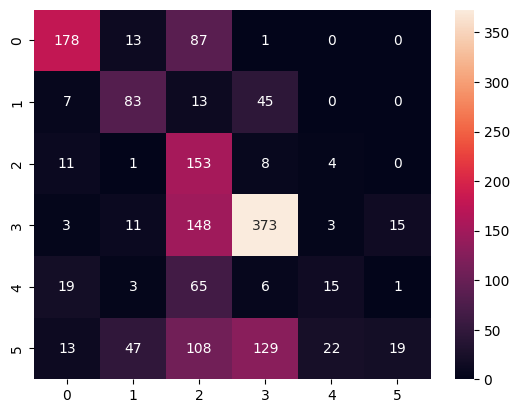

In [ ]:
# Conf Matrix
sns_matrix= sns.heatmap(confusion_matrix_Attitude, annot= True, fmt='g')

In [ ]:
sns_matrix.figure.savefig("Conf_mat_Attitude_SentTrans_BERT without duplicates.png")

# SetFit with Bart (bart-large-mnli)

In [ ]:
model_bart = SetFitModel.from_pretrained("tyzp-INC/few-shot-fb-bart-large-mnli")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

model_head.pkl:   0%|          | 0.00/9.04k [00:00<?, ?B/s]

In [ ]:
args = TrainingArguments(
    batch_size=16,
    num_epochs=5,# Number of epochs to use for contrastive learning
)

In [ ]:
model_bart.lables = ['affect-positive', 'affect-negative', 'appreciation-positive', 'appreciation-negative', 'judgement-positive', 'judgement-negative']

In [ ]:
# Creating the trainer
trainer = SetFitTrainer(
    model=model_bart,
    train_dataset=training_data,
    eval_dataset=test_data,
    loss_class=CosineSimilarityLoss,
    batch_size=16,
    num_iterations=20, # Number of text pairs to generate for contrastive learning
    num_epochs=1, # Number of epochs to use for contrastive learning
    column_mapping={"text": "text", "label": "label"}
)

<ipython-input-17-b9a418a44390>:2: DeprecationWarning: `SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.
  trainer = SetFitTrainer(
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset


Map:   0%|          | 0/60 [00:00<?, ? examples/s]

In [ ]:
# Training
trainer.train()

***** Running training *****
  Num unique pairs = 2400
  Batch size = 16
  Num epochs = 1
  Total optimization steps = 150


Step,Training Loss


In [ ]:
trainer.evaluate(test_data)

Applying column mapping to the evaluation dataset
***** Running evaluation *****


{'accuracy': 0.5261845386533666}

## Prediction of labels

In [ ]:
# Predicting labels with BART-setfit
predicted_attitude_bart = model_bart.predict(test_data_df['text'])

In [ ]:
 # Adding column with predicted labels to original test dataset
test_data_df['SetFit-BART Attitude Predicted']=pd.Series(predicted_attitude_bart)

In [ ]:
test_data_df['SetFit-BART Attitude Predicted'].value_counts()

judgement-negative       641
judgement-positive       548
affect-positive          216
affect-negative          114
appreciation-negative     63
appreciation-positive     22
Name: SetFit-BART Attitude Predicted, dtype: int64

In [ ]:
test_data_df['label'].value_counts()

judgement-negative       553
appreciation-negative    338
affect-positive          279
judgement-positive       177
affect-negative          148
appreciation-positive    109
Name: label, dtype: int64

In [ ]:
test_data_df

,Annotated Text,label,Topic_Agenda Item,text,Appraisal?,SetFit-BART Attitude Predicted
0,wishes to express its satisfaction,affect-positive,United Nations peacekeeping operations,Uruguay wishes to express its satisfaction for...,yes,affect-positive
1,we want to thank,affect-positive,United Nations peacekeeping operations,"At the outset, we want to thank the United Sta...",yes,affect-positive
2,is very pleased,affect-positive,United Nations peacekeeping operations,Uruguay is very pleased to join the rest of th...,yes,affect-positive
3,problem,appreciation-negative,United Nations peacekeeping operations,that dealing with this problem can no longer b...,yes,judgement-negative
4,voted in favour,affect-positive,United Nations peacekeeping operations,"For all of those reasons, therefore, Uruguay v...",yes,judgement-positive
...,...,...,...,...,...,...
1599,We very much hope,affect-positive,Ukraine,We very much hope,yes,affect-positive
1600,crisis,appreciation-negative,Ukraine,and show the way towards a political solution ...,yes,judgement-positive
1601,criminal decree,appreciation-negative,Ukraine,that are currently enshrined in the criminal d...,yes,judgement-negative
1602,extremely significant consequences,appreciation-negative,Ukraine,That would have extremely significant conseque...,yes,judgement-negative


In [ ]:
# Saving predictions
test_data_df.to_csv("SetFit-BART Attitude Results_without Duplicates.csv")

### Evaluation

In [ ]:
# Calculating accuracy-
accuracy_att_bart = accuracy_score(predicted_attitude_bart, gold_labels_attitude)
print("Accuracy score: {:.2f}".format(accuracy_att_bart*100))

Accuracy score: 52.62


In [ ]:
# Classification Report - INTERPRET THIS RESULTS
# y_true, y_pred, labels= xxx
print(classification_report(gold_labels_attitude, predicted_attitude_bart))

                       precision    recall  f1-score   support

      affect-negative       0.64      0.49      0.56       148
      affect-positive       0.76      0.59      0.66       279
appreciation-negative       0.48      0.09      0.15       338
appreciation-positive       0.45      0.09      0.15       109
   judgement-negative       0.64      0.74      0.69       553
   judgement-positive       0.28      0.88      0.43       177

             accuracy                           0.53      1604
            macro avg       0.54      0.48      0.44      1604
         weighted avg       0.57      0.53      0.49      1604



In [ ]:
# Confusion Matrix
# y_true, y_pred, labels= xxx
confusion_matrix_Attitude_Bart = confusion_matrix(gold_labels_attitude, predicted_attitude_bart, labels=attitude_labels)

In [ ]:
confusion_matrix_Attitude_Bart

array([[164,   1, 110,   4,   0,   0],
       [ 17,  73,  12,  45,   0,   1],
       [  8,   1, 156,  10,   2,   0],
       [  3,  10,  94, 411,   3,  32],
       [ 18,   1,  72,   8,  10,   0],
       [  6,  28, 104, 163,   7,  30]])

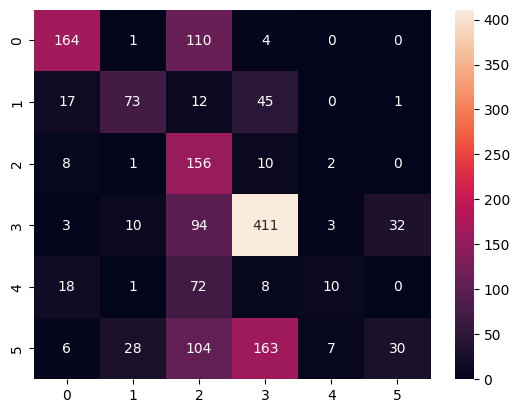

In [ ]:
 # Conf Matrix
 sns_matrix_BART= sns.heatmap(confusion_matrix_Attitude_Bart, annot= True, fmt='g')

In [ ]:
sns_matrix_BART.figure.savefig("Conf_mat_Attitude_Sent-Trans-BART.png")

# SetFit with RoBERTa (sentence-transformers/all-roberta-large-v1)

In [ ]:
model_roberta = SetFitModel.from_pretrained("sentence-transformers/all-roberta-large-v1")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
args = TrainingArguments(
    batch_size=16,
    num_epochs=5,# Number of epochs to use for contrastive learning
)

In [ ]:
model_roberta.lables = ['affect-positive', 'affect-negative', 'appreciation-positive', 'appreciation-negative', 'judgement-positive', 'judgement-negative']

In [ ]:
# Creating the trainer
trainer_rob = SetFitTrainer(
    model=model_roberta,
    train_dataset=training_data,
    eval_dataset=test_data,
    loss_class=CosineSimilarityLoss,
    batch_size=16,
    num_iterations=20, # Number of text pairs to generate for contrastive learning
    num_epochs=5, # Number of epochs to use for contrastive learning
    column_mapping={"text": "text", "label": "label"}
)

<ipython-input-20-05fc442af50e>:2: DeprecationWarning: `SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.
  trainer_rob = SetFitTrainer(
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset


Map:   0%|          | 0/60 [00:00<?, ? examples/s]

In [ ]:
# Training
trainer_rob.train()

***** Running training *****
  Num unique pairs = 2400
  Batch size = 16
  Num epochs = 5
  Total optimization steps = 750


Step,Training Loss


In [ ]:
trainer_rob.evaluate(test_data)

Applying column mapping to the evaluation dataset
***** Running evaluation *****


{'accuracy': 0.435785536159601}

## Labels Prediction

In [ ]:
# Predicting labels for test data 10 speeches annotated
predicted_Attitude_Rob = model_roberta.predict(test_data_df['text'])

In [ ]:
 # Adding column with predicted labels to original test dataset
test_data_df['Attitude Pred Sent-Trans-RoBERTa']=pd.Series(predicted_Attitude_Rob)

In [ ]:
test_data_df['Attitude Pred Sent-Trans-RoBERTa'].value_counts()

judgement-positive       664
judgement-negative       526
appreciation-negative    138
affect-negative          117
appreciation-positive     89
affect-positive           70
Name: Attitude Pred Sent-Trans-RoBERTa, dtype: int64

In [ ]:
test_data_df

,Annotated Text,label,Topic_Agenda Item,text,Appraisal?,Appraisal Pred Sent-Trans-BART,Appraisal Pred Sent-Trans-BERT,Appraisal Pred Sent-Trans-T5,Attitude Pred Sent-Trans-RoBERTa
0,wishes to express its satisfaction,affect-positive,United Nations peacekeeping operations,Uruguay wishes to express its satisfaction for...,yes,affect-positive,affect-positive,affect-positive,affect-positive
1,we want to thank,affect-positive,United Nations peacekeeping operations,"At the outset, we want to thank the United Sta...",yes,affect-positive,judgement-positive,affect-positive,judgement-positive
2,is very pleased,affect-positive,United Nations peacekeeping operations,Uruguay is very pleased to join the rest of th...,yes,affect-positive,affect-positive,affect-positive,affect-positive
3,problem,appreciation-negative,United Nations peacekeeping operations,that dealing with this problem can no longer b...,yes,judgement-negative,judgement-positive,judgement-positive,appreciation-negative
4,voted in favour,affect-positive,United Nations peacekeeping operations,"For all of those reasons, therefore, Uruguay v...",yes,judgement-positive,judgement-positive,affect-positive,judgement-positive
...,...,...,...,...,...,...,...,...,...
1599,We very much hope,affect-positive,Ukraine,We very much hope,yes,affect-positive,affect-positive,affect-positive,affect-positive
1600,crisis,appreciation-negative,Ukraine,and show the way towards a political solution ...,yes,judgement-positive,judgement-positive,appreciation-positive,appreciation-positive
1601,criminal decree,appreciation-negative,Ukraine,that are currently enshrined in the criminal d...,yes,judgement-negative,judgement-negative,appreciation-negative,judgement-positive
1602,extremely significant consequences,appreciation-negative,Ukraine,That would have extremely significant conseque...,yes,judgement-negative,judgement-positive,appreciation-negative,judgement-negative


In [ ]:
# Saving predictions
test_data_df.to_excel("Results Attitude Sent-Trans Without Duplicates.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Evaluation

In [ ]:
# Calculating accuracy-
accuracy_att_Rob = accuracy_score(predicted_Attitude_Rob, gold_labels_attitude)
print("Accuracy score: {:.2f}".format(accuracy_att_Rob*100))

Accuracy score: 43.58


In [ ]:
# Classification Report - INTERPRET THIS RESULTS
# y_true, y_pred, labels= xxx
print(classification_report(gold_labels_attitude, predicted_Attitude_Rob))

                       precision    recall  f1-score   support

      affect-negative       0.65      0.51      0.57       148
      affect-positive       0.90      0.23      0.36       279
appreciation-negative       0.41      0.17      0.24       338
appreciation-positive       0.21      0.17      0.19       109
   judgement-negative       0.63      0.60      0.62       553
   judgement-positive       0.23      0.85      0.36       177

             accuracy                           0.44      1604
            macro avg       0.51      0.42      0.39      1604
         weighted avg       0.56      0.44      0.43      1604



In [ ]:
# Confusion Matrix
# y_true, y_pred, labels= xxx
confusion_matrix_Attitude_Rob = confusion_matrix(gold_labels_attitude, predicted_Attitude_Rob, labels=attitude_labels)

In [ ]:
confusion_matrix_Attitude_Rob

array([[ 63,  12, 198,   3,   3,   0],
       [  2,  76,  15,  54,   0,   1],
       [  3,   1, 150,   7,  14,   2],
       [  0,   5, 121, 334,  17,  76],
       [  2,   2,  82,   2,  19,   2],
       [  0,  21,  98, 126,  36,  57]])

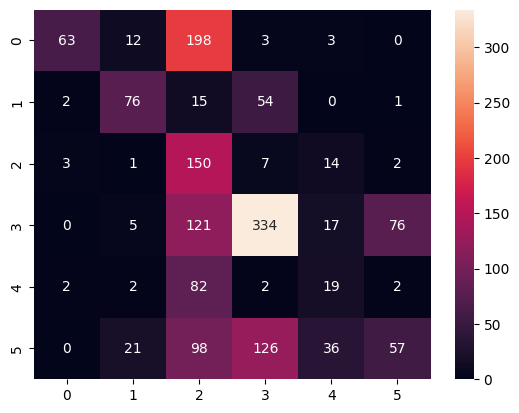

In [ ]:
# Conf Matrix
sns_matrix_Rob= sns.heatmap(confusion_matrix_Attitude_Rob, annot= True, fmt='g')

In [ ]:
sns_matrix_Rob.figure.savefig("Conf_mat_Att_SentTrans_RoBERTa.png")

# SetFit with T5 (sentence-transformers/sentence-t5-base)

In [ ]:
model_t5 = SetFitModel.from_pretrained("sentence-transformers/sentence-t5-base")

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/219M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
args = TrainingArguments(
    batch_size=16,
    num_epochs=5,# Number of epochs to use for contrastive learning
)

In [ ]:
model_t5.lables = ['affect-positive', 'affect-negative', 'appreciation-positive', 'appreciation-negative', 'judgement-positive', 'judgement-negative']

In [ ]:
# Creating the trainer
trainer = SetFitTrainer(
    model=model_t5,
    train_dataset=training_data,
    eval_dataset=test_data,
    loss_class=CosineSimilarityLoss,
    batch_size=16,
    num_iterations=20, # Number of text pairs to generate for contrastive learning
    num_epochs=1, # Number of epochs to use for contrastive learning
    column_mapping={"text": "text", "label": "label"}
)

<ipython-input-60-f27be139d571>:2: DeprecationWarning: `SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.
  trainer = SetFitTrainer(
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset


Map:   0%|          | 0/60 [00:00<?, ? examples/s]

In [ ]:
# Training
trainer.train()

***** Running training *****
  Num unique pairs = 2400
  Batch size = 16
  Num epochs = 1
  Total optimization steps = 150


Step,Training Loss


In [ ]:
trainer.evaluate(test_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Applying column mapping to the evaluation dataset
***** Running evaluation *****


{'accuracy': 0.5130922693266833}

## Label predictions

In [ ]:
# Predicting labels for test data 10 speeches annotated
predicted_Attitude_T5 = model_t5.predict(test_data_df['text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
 # Adding column with predicted labels to original test dataset
test_data_df['Results Attitude SetFit-T5']=pd.Series(predicted_Attitude_T5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
test_data_df['Results Attitude SetFit-T5'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


judgement-positive       463
judgement-negative       448
affect-positive          238
appreciation-negative    180
affect-negative          172
appreciation-positive    103
Name: Results Attitude SetFit-T5, dtype: int64

In [ ]:
test_data_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Annotated Text,label,Topic_Agenda Item,text,Appraisal?,SetFit-BART Attitude Predicted,Appraisal Pred Sent-Trans-BERT,Attitude Pred Sent-Trans-BERT,Results Attitude SetFit-T5
0,wishes to express its satisfaction,affect-positive,United Nations peacekeeping operations,Uruguay wishes to express its satisfaction for...,yes,affect-positive,affect-positive,affect-positive,affect-positive
1,we want to thank,affect-positive,United Nations peacekeeping operations,"At the outset, we want to thank the United Sta...",yes,affect-positive,judgement-positive,judgement-positive,affect-positive
2,is very pleased,affect-positive,United Nations peacekeeping operations,Uruguay is very pleased to join the rest of th...,yes,affect-positive,affect-positive,affect-positive,affect-positive
3,problem,appreciation-negative,United Nations peacekeeping operations,that dealing with this problem can no longer b...,yes,judgement-negative,judgement-positive,judgement-positive,judgement-positive
4,voted in favour,affect-positive,United Nations peacekeeping operations,"For all of those reasons, therefore, Uruguay v...",yes,judgement-positive,judgement-positive,judgement-positive,affect-positive
...,...,...,...,...,...,...,...,...,...
1599,We very much hope,affect-positive,Ukraine,We very much hope,yes,affect-positive,affect-positive,affect-positive,affect-positive
1600,crisis,appreciation-negative,Ukraine,and show the way towards a political solution ...,yes,judgement-positive,judgement-positive,judgement-positive,appreciation-positive
1601,criminal decree,appreciation-negative,Ukraine,that are currently enshrined in the criminal d...,yes,judgement-negative,judgement-negative,judgement-negative,appreciation-negative
1602,extremely significant consequences,appreciation-negative,Ukraine,That would have extremely significant conseque...,yes,judgement-negative,judgement-positive,judgement-positive,appreciation-negative


In [ ]:
# Saving predictions
test_data_df.to_csv("Results Attitude SetFit-T5 without duplicates.csv")

### Evaluation

In [ ]:
# Calculating accuracy-
accuracy_att_T5 = accuracy_score(predicted_Attitude_T5, gold_labels_attitude)
print("Accuracy score: {:.2f}".format(accuracy_att_T5*100))

Accuracy score: 51.31


In [ ]:
# Classification Report - INTERPRET THIS RESULTS
# y_true, y_pred, labels= xxx
print(classification_report(gold_labels_attitude, predicted_Attitude_T5))

                       precision    recall  f1-score   support

      affect-negative       0.45      0.53      0.49       148
      affect-positive       0.80      0.68      0.74       279
appreciation-negative       0.44      0.24      0.31       338
appreciation-positive       0.41      0.39      0.40       109
   judgement-negative       0.67      0.54      0.60       553
   judgement-positive       0.29      0.75      0.42       177

             accuracy                           0.51      1604
            macro avg       0.51      0.52      0.49      1604
         weighted avg       0.56      0.51      0.52      1604



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Confusion Matrix
# y_true, y_pred, labels= xxx
confusion_matrix_Attitude_T5 = confusion_matrix(gold_labels_attitude, predicted_Attitude_T5, labels=attitude_labels)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
confusion_matrix_Attitude_T5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[191,   6,  69,   4,   9,   0],
       [  9,  78,  13,  41,   1,   6],
       [ 10,   2, 133,  14,  16,   2],
       [  9,  24, 123, 299,   8,  90],
       [ 12,   4,  44,   5,  42,   2],
       [  7,  58,  81,  85,  27,  80]])

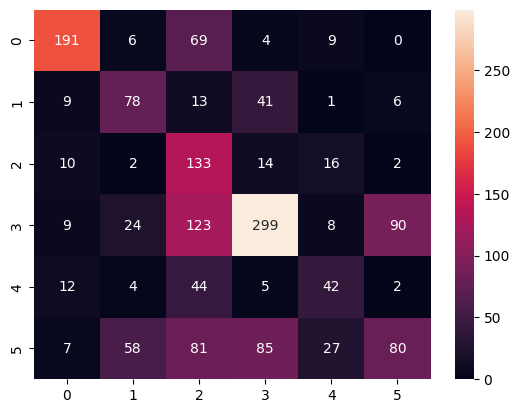

In [ ]:
# Conf Matrix
sns_matrix_t5 = sns.heatmap(confusion_matrix_Attitude_T5, annot= True, fmt='g')

In [ ]:
sns_matrix_t5.figure.savefig("Conf_mat_Att_SentTrans_T5 without duplicates.png")